In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [ ]:
from libraryIR import *
path_to_pool = "C:\\Users\\annar\\Desktop\\Progetto_IR\\MatlabIR\\qrelstrec7.txt"    

### We look the MAP of all the run in input and we order them

In [ ]:
weights_dict={'n_BM25b0.75_0.res': 0.075, 'n_BB2c1.0_1.res': 0.0785, 'n_DPH_4.res': 0.0728, 'n_LemurTF_IDF_6.res': 0.0765, 'n_PL2c1.0_8.res': 0.069, 'n_DLH_3.res': 0.0743, 'n_TF_IDF_9.res': 0.0749, 'n_In_expB2c1.0_5.res': 0.0784, 'n_DFR_BM25c1.0_2.res': 0.0754, 'n_LGDc1.0_7.res': 0.0762}
import operator
sorted_w = sorted(weights_dict.items(), key=operator.itemgetter(1), reverse=True)
print sorted_w 


### We execute Condorcet,Condorcet Weighted, CondorcetML, CondorcetLog on a set of systems and we progressively increased the number of systems used
We select progressively best k systems

In [17]:
path = "C:\\Users\\annar\\Desktop\\temp\\temp"     
dir_in = "input"   
dir_w = "weights"     
dir_w_ml="weights_ml"
dir_w_log="weights_log"
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)

results={}
        

for i in range(1,len(filename_list)+1,1):
    print (i)
    if(i<=6):
        repeat=1
    else:
        repeat=1
    results[i]={"condorcet.txt":0,"condorcetWeighted.txt":0,"condorcetML.txt":0,"condorcetLog.txt":0}
    for j in range(0,repeat,1):
        perm=[ sorted_w[k][0] for k in range(0,i) ]
        print ("Ripetizione numero: "+str(j))
        #print perm
        #Calcolo condorcet e condercet_pesato
        condorcet_alg(perm, path, dir_norm, dir_comb)
        MAP=take_MAP(path,dir_comb,dir_w,"condorcet.txt",False)#calcolo il MAP
        results[i]["condorcet.txt"]+=MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        MAP=take_MAP(path,dir_comb,dir_w,"condorcetWeighted.txt",False)#calcolo il MAP
        results[i]["condorcetWeighted.txt"]+=MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_ml,"condorcetML.txt")
        MAP=take_MAP(path,dir_comb,dir_w,"condorcetML.txt",False)#calcolo il MAP
        results[i]["condorcetML.txt"]+=MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_log,"condorcetLog.txt")
        MAP=take_MAP(path,dir_comb,dir_w,"condorcetLog.txt",False)#calcolo il MAP
        results[i]["condorcetLog.txt"]+=MAP        
    #calcolo media per i sistemi    
    results[i]["condorcet.txt"]=results[i]["condorcet.txt"]/repeat
    results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat
    results[i]["condorcetML.txt"]=results[i]["condorcetML.txt"]/repeat
    results[i]["condorcetLog.txt"]=results[i]["condorcetLog.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [32]:
print results

{1: {'condorcet.txt': 0.0727573798246, 'condorcetML.txt': 0.0727573798246, 'condorcetWeighted.txt': 0.0727573798246, 'condorcetLog.txt': 0.0727573798246}, 2: {'condorcet.txt': 0.0753394923044, 'condorcetML.txt': 0.0785835329819, 'condorcetWeighted.txt': 0.0785835329819, 'condorcetLog.txt': 0.0785835329819}, 3: {'condorcet.txt': 0.0723408329127, 'condorcetML.txt': 0.0731095115466, 'condorcetWeighted.txt': 0.0721356565178, 'condorcetLog.txt': 0.0727219190478}, 4: {'condorcet.txt': 0.0761570066118, 'condorcetML.txt': 0.0754822708915, 'condorcetWeighted.txt': 0.0788933932924, 'condorcetLog.txt': 0.0754963168912}, 5: {'condorcet.txt': 0.0756321594461, 'condorcetML.txt': 0.075703711218, 'condorcetWeighted.txt': 0.0756237468151, 'condorcetLog.txt': 0.0757546171263}, 6: {'condorcet.txt': 0.0755060219795, 'condorcetML.txt': 0.0755224039074, 'condorcetWeighted.txt': 0.0758317726403, 'condorcetLog.txt': 0.0755207784752}, 7: {'condorcet.txt': 0.0770318759709, 'condorcetML.txt': 0.074166609197, 'co

In [18]:
keys=results.keys()
x=[]+keys
y1=[]
y2=[]
y3=[]
y4=[]

for i in range(1,len(keys)+1):
    y1.append(results[i]['condorcet.txt'])
    y2.append(results[i]['condorcetWeighted.txt'])
    y3.append(results[i]['condorcetML.txt'])
    y4.append(results[i]['condorcetLog.txt'])

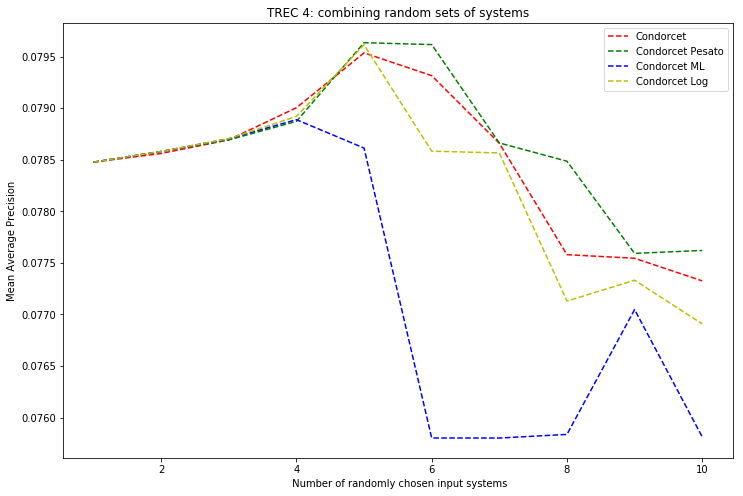

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]

plt.xlabel(' Number of randomly chosen input systems')
plt.ylabel('Mean Average Precision')
plt.title('TREC 4: combining random sets of systems')
plt.plot(x,y1,'r--',x,y2,'g--',x,y3,'b--',x,y4,'y--')
plt.legend(["Condorcet","Condorcet Pesato","Condorcet ML","Condorcet Log"])
plt.show()